In [1]:
CONFIG_PATH = "configs/subreddit_minority.yml"

In [2]:

from utils import get_config
from superdebug import debug
from process_data import get_model_input
config = get_config(CONFIG_PATH, print_config = False) # default config
target, original_feature_map, categorical_features, string_features, train_data, test_data, test_data_info, train_submission_upvote_df, num_all_users = get_model_input(config)

为了使用邮件提醒功能，请设置环境变量MY_QQ_EMAIL（QQ邮箱地址）与MY_QQ_EMAIL_PWD（QQ邮箱授权码）
------------------ 2022-08-20 08:22:44 ------------------


Version 7.5.0 of praw is outdated. Version 7.6.0 was released Tuesday May 10, 2022.


GPU ready...
------------------ 2022-08-20 08:22:46 ------------------
DEBUG: at /home/TableSense/largedisk/wanrong/Curation-Modeling/process_data.py:363 get_model_input
Loading prepared data...
------------------ 2022-08-20 08:22:46 ------------------


In [7]:
set(train_data["SUBREDDIT"])

{'r/Conservative',
 'r/Feminism',
 'r/LesbianActually',
 'r/Liberal',
 'r/MensRights',
 'r/Republican',
 'r/ScienceFacts',
 'r/Showerthoughts',
 'r/VoteBlue',
 'r/democrats',
 'r/gay',
 'r/politics',
 'r/science',
 'r/shittyaskscience',
 'r/technology',
 'r/teenagers',
 'r/trans'}

In [3]:
test_data[test_data["SUBREDDIT"] == "r/politics"].head()

,SUBMISSION_ID,SUBREDDIT,CREATED_TIME,USERNAME,VOTE,TITLE,AUTHOR,#_COMMENTS,NSFW,SCORE,UPVOTED_%,LINK,SUBMISSION_TEXT,SUBMISSION_URL,UPVOTED_USERS,USERNAME_,DOWNVOTED_USERS
3,t3_f4tktz,r/politics,Sun Feb 16 2020,175666,1.0,White House Memo Admits There Was No “Imminent...,107096,2802,false,53918,0.87,https://www.reddit.com/r/politics/comments/f4t...,White House Memo Admits There Was No “Imminent...,https://slate.com/news-and-politics/2020/02/wh...,[],{175666},[]
4,t3_b28a24,r/politics,Sun Mar 17 2019,169341,0.0,Trump is 'dangerous' and 'may fabricate' anoth...,91349,2690,false,37366,0.78,https://www.reddit.com/r/politics/comments/b28...,Trump is 'dangerous' and 'may fabricate' anoth...,https://www.newsweek.com/trump-dangerous-fabri...,[],{169341},[]
5,t3_etfhop,r/politics,Fri Jan 24 2020,85862,1.0,Trump wants you to think ‘everyone does it.’ N...,124351,223,false,8916,0.97,https://www.reddit.com/r/politics/comments/etf...,Trump wants you to think ‘everyone does it.’ N...,https://www.washingtonpost.com/opinions/2020/0...,[],{85862},[]
8,t3_c0nb9a,r/politics,Fri Jun 14 2019,75607,1.0,"Jared and Ivanka, Who “Sacrificed” Everything ...",139806,313,false,8334,0.97,https://www.reddit.com/r/politics/comments/c0n...,"Jared and Ivanka, Who “Sacrificed” Everything ...",https://www.vanityfair.com/news/2019/06/ivanka...,[],{75607},[]
9,t3_eeqt19,r/politics,Mon Dec 23 2019,26320,0.0,Obama Is Reportedly Talking Up Elizabeth Warre...,163033,270,false,695,0.90,https://www.reddit.com/r/politics/comments/eeq...,Obama Is Reportedly Talking Up Elizabeth Warre...,https://www.huffpost.com/entry/barack-obama-el...,[],{26320},[]


In [4]:
from collections import Counter, defaultdict, OrderedDict
debug(train_upvote = sum(train_data["VOTE"] == 1),
    train_downvote = sum(train_data["VOTE"] == 0),
    test_upvote = sum(test_data["VOTE"] == 1),
    test_downvote = sum(test_data["VOTE"] == 0),
    )
user_votes = Counter()
submission_votes = Counter()
subreddit_subreddit_votes = defaultdict(Counter)
for row_i, row in train_data.iterrows():
    submission_votes[row["SUBMISSION_ID"]] += 1
    user_votes[row["USERNAME"]] += 1
    subreddit_subreddit_votes[row["SUBREDDIT"]][row["VOTE"]] += 1
    if "users" not in subreddit_subreddit_votes[row["SUBREDDIT"]]:
        subreddit_subreddit_votes[row["SUBREDDIT"]]["users"] = set()
    subreddit_subreddit_votes[row["SUBREDDIT"]]["users"].add(row["USERNAME"])


------------------ 2022-08-20 08:23:04 ------------------
DEBUG: 4 vars: ['train_upvote', 'train_downvote', 'test_upvote', 'test_downvote'], at <ipython-input-4-bf241b5dc052>:5 <module>
0 / 1.  train_upvote num val: 1078466
1 / 2.  train_downvote num val: 383670
2 / 3.  test_upvote num val: 269610
3 / 4.  test_downvote num val: 95924
------------------ 2022-08-20 08:23:04 ------------------


------------------ 2022-08-20 08:29:26 ------------------
DEBUG: 1 vars: ['distribution'], at <ipython-input-6-07c3b14be516>:12 draw_histogram
0 / 6.  distribution str len 8505: OrderedDict([(1, 2629), (2, 1783), (3, 1397), (4, 1130), (5, 956), (6, 851), (7, 757), (8, 698), (9, 679), (10, 622), (11, 530), (12, 534), (13, 492), (14, 457), (15, 417), (16, 445), (17, 417), (18, 347), (19, 348), (20, 342), (21, 331), (22, 301), (23, 286), (24, 274), (25, 255), (26, 244), (27, 251), (28, 241), (29, 191), (30, 223), (31, 209), (32, 192), (33, 201), (34, 181), (35, 180), (36, 184), (37, 191), (38, 150), (39, 156), (40, 155), (41, 132), (42, 120), (43, 121), (44, 124), (45, 124), (46, 103), (47, 1 ... 517, 1), (5336, 1)])
------------------ 2022-08-20 08:29:26 ------------------
------------------ 2022-08-20 08:29:26 ------------------
DEBUG: at <ipython-input-6-07c3b14be516>:14 draw_histogram
10% of x take up 86.0559% of distribution
------------------ 2022-08-20 08:29:26 ------------------


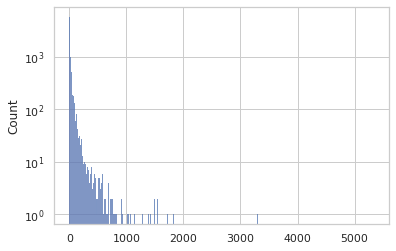

------------------ 2022-08-20 08:29:29 ------------------
DEBUG: at <ipython-input-6-07c3b14be516>:19 draw_histogram
Figure saved in output/user_votes_distribution.png
------------------ 2022-08-20 08:29:29 ------------------
------------------ 2022-08-20 08:29:45 ------------------
DEBUG: 1 vars: ['distribution'], at <ipython-input-6-07c3b14be516>:12 draw_histogram
0 / 7.  distribution str len 2922: OrderedDict([(1, 278980), (2, 55900), (3, 25263), (4, 14118), (5, 9452), (6, 6368), (7, 4801), (8, 3672), (9, 2888), (10, 2390), (11, 1999), (12, 1672), (13, 1495), (14, 1274), (15, 1098), (16, 955), (17, 858), (18, 838), (19, 694), (20, 679), (21, 613), (22, 550), (23, 469), (24, 448), (25, 453), (26, 419), (27, 344), (28, 311), (29, 307), (30, 295), (31, 275), (32, 257), (33, 262), (34, 225), (35, 241), (36, 181), (37, 201), (38, 166), (39, 124), (40, 168), (41, 135), (42, 127), (43, 143), (44, 127), (45, 140), ( ... (386, 1), (514, 1)])
------------------ 2022-08-20 08:29:45 -----------

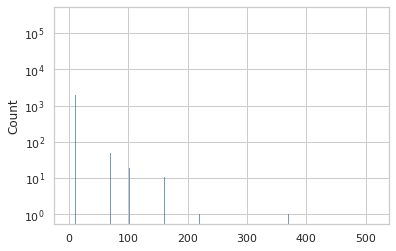

------------------ 2022-08-20 08:30:13 ------------------
DEBUG: at <ipython-input-6-07c3b14be516>:19 draw_histogram
Figure saved in output/submission_votes_distribution.png
------------------ 2022-08-20 08:30:13 ------------------


In [6]:
from importlib_metadata import distribution
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
def draw_histogram(nums:list, file_name):
    sns.set_theme(style="whitegrid")
    ax = sns.histplot(data=nums)
    ax.set_yscale('log')
    # ax.set_xscale('log')
    distribution = OrderedDict(sorted(list(Counter(nums).items())))
    debug(distribution=str(distribution))
    # ax.text(-0.15, 1.1, distribution, fontsize=7, transform=ax.transAxes)
    debug(f"10% of x take up {sum(OrderedDict(list(distribution.items())[:len(distribution)//10]).values()) / sum(distribution.values()) * 100:.4f}% of distribution")
    save_path = f"output/{file_name}.png"
    plt.show()
    plt.savefig(save_path, dpi = 300)
    plt.close()
    debug(f"Figure saved in {save_path}")

draw_histogram(list(user_votes.values()), "user_votes_distribution")
draw_histogram(list(submission_votes.values()), "submission_votes_distribution")

In [ ]:
for subreddit in subreddit_subreddit_votes:
    subreddit_subreddit_votes[subreddit]["downvote_rate"] = 100 * subreddit_subreddit_votes[subreddit][0] / (subreddit_subreddit_votes[subreddit][1] + subreddit_subreddit_votes[subreddit][0])
    subreddit_subreddit_votes[subreddit]["subreddit"] = original_feature_map["SUBREDDIT"][subreddit]
    subreddit_subreddit_votes[subreddit]["users"] = str(subreddit_subreddit_votes[subreddit]["users"])
subreddit_subreddit_votes = pd.DataFrame(list(subreddit_subreddit_votes.values())).set_index("subreddit")
debug(subreddit_votes=subreddit_subreddit_votes)
save_path = "output/subreddit_votes_users.csv"
subreddit_subreddit_votes.to_csv(save_path)
debug(f"Votes of each subreddit is saved to {save_path}")

KeyError: 'r/teenagers'